In [39]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [40]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [41]:
X_train_full.shape

(50000, 32, 32, 3)

In [42]:
X_train_full.dtype

dtype('uint8')

In [43]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [44]:
assert X_train.shape == (45000, 32, 32, 3)
assert y_train.shape == (45000, 1)

assert X_valid.shape == (5000, 32, 32, 3)
assert y_valid.shape == (5000, 1)

assert X_test.shape == (10000, 32, 32, 3)
assert y_test.shape == (10000, 1)

In [45]:
X_train[0]

array([[[0.23529412, 0.32156863, 0.21176471],
        [0.15686275, 0.26666667, 0.14117647],
        [0.20392157, 0.31764706, 0.20392157],
        ...,
        [0.20784314, 0.16862745, 0.19607843],
        [0.25882353, 0.21568627, 0.23921569],
        [0.28627451, 0.24313725, 0.26666667]],

       [[0.43921569, 0.44705882, 0.44705882],
        [0.22745098, 0.27843137, 0.21960784],
        [0.22745098, 0.31764706, 0.20784314],
        ...,
        [0.21176471, 0.18431373, 0.20784314],
        [0.2627451 , 0.22745098, 0.25490196],
        [0.28235294, 0.24313725, 0.27058824]],

       [[0.66666667, 0.63137255, 0.69803922],
        [0.46666667, 0.4627451 , 0.47058824],
        [0.31372549, 0.34901961, 0.29019608],
        ...,
        [0.21960784, 0.19607843, 0.21960784],
        [0.2745098 , 0.24705882, 0.2745098 ],
        [0.28235294, 0.25098039, 0.27843137]],

       ...,

       [[0.35686275, 0.44313725, 0.36862745],
        [0.23137255, 0.3254902 , 0.24313725],
        [0.17647059, 0

In [46]:
class_names = ["Airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

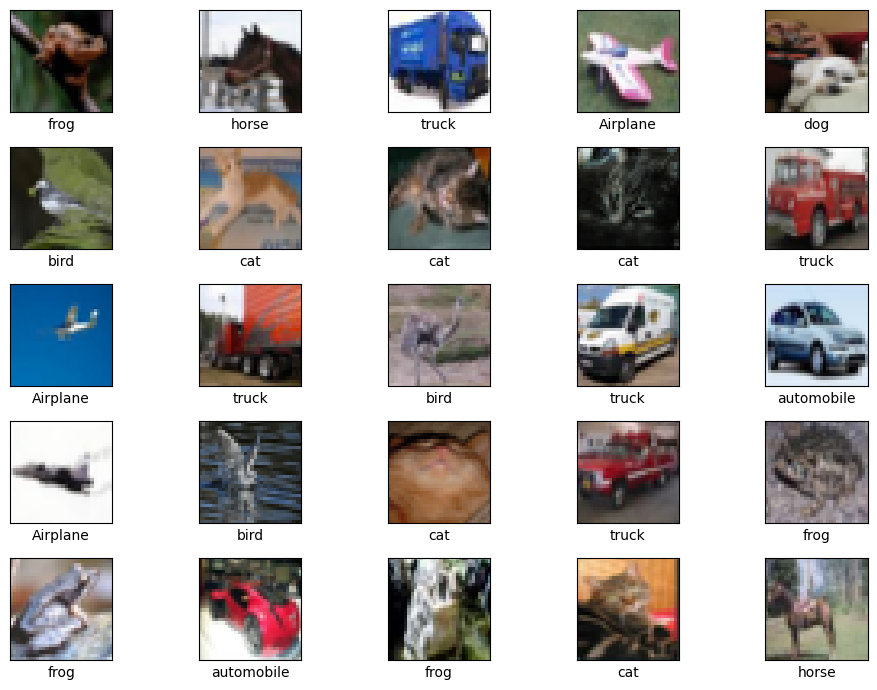

In [47]:
plt.figure(figsize=(10, 7))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

In [48]:
X_train.shape

(45000, 32, 32, 3)

In [49]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train_full))

y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

In [50]:
model = keras.models.Sequential([
    #1st Convolutional Block
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # 2nd Convolutional Block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # 3rd Convolutional Block
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    #Fully Connected Layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [52]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [53]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

In [54]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 18s 10ms/step - loss: 1.5444 - accuracy: 0.4485 - val_loss: 1.1413 - val_accuracy: 0.5958
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.0948 - accuracy: 0.6153 - val_loss: 0.9968 - val_accuracy: 0.6522
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 0.9265 - accuracy: 0.6802 - val_loss: 0.9634 - val_accuracy: 0.6840
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 0.8234 - accuracy: 0.7160 - val_loss: 0.7438 - val_accuracy: 0.7454
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.7338 - accuracy: 0.7492 - val_loss: 0.6503 - val_accuracy: 0.7760
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.6695 - accuracy: 0.7713 - val_loss: 0.9855 - val_accuracy: 0.6920
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 0.6212 - accuracy: 0.7880 - val_loss: 0.660

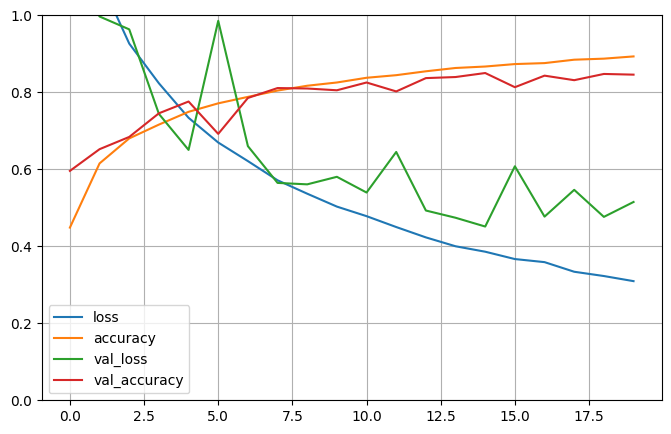

In [56]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5040 - accuracy: 0.8413


[0.5039703845977783, 0.8413000106811523]

313/313 [==============================] - 1s 3ms/step


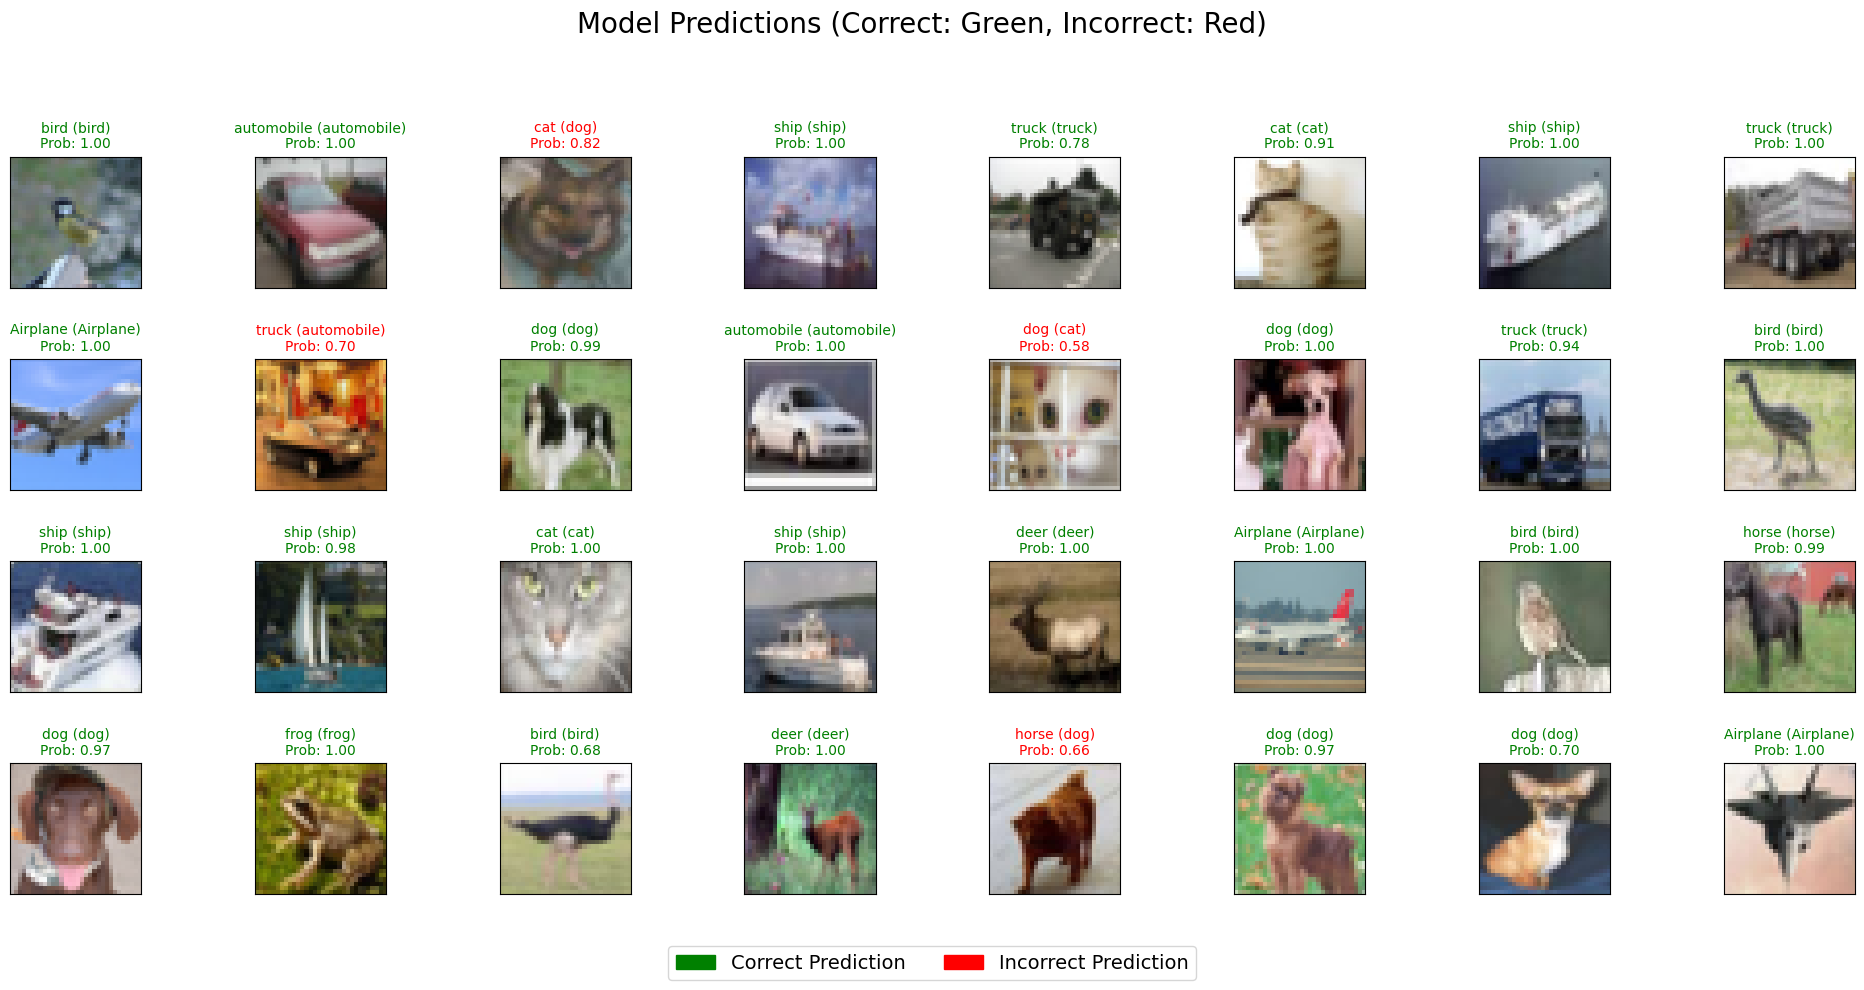

In [58]:
import matplotlib.patches as mpatches

# Predicting the classes with the model
y_hat = model.predict(X_test)

#seed for reproducibility
np.random.seed(42)

#random indices for visualization
indices = np.random.choice(X_test.shape[0], size=32, replace=False)

fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(20, 10))
fig.suptitle('Model Predictions (Correct: Green, Incorrect: Red)', fontsize=20)
fig.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])

green_patch = mpatches.Patch(color='green', label='Correct Prediction')
red_patch = mpatches.Patch(color='red', label='Incorrect Prediction')
fig.legend(handles=[green_patch, red_patch], loc='lower center', ncol=2, fontsize=14)

for i, idx in enumerate(indices):
    ax = axes[i//8, i%8]
    ax.imshow(np.squeeze(X_test[idx]), interpolation='nearest')

    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    prob = np.max(y_hat[idx])

    ax.set_title(f"{class_names[pred_idx]} ({class_names[true_idx]})\nProb: {prob:.2f}",
                 color=("green" if pred_idx == true_idx else "red"), fontsize=10)

    ax.set_xticks([])
    ax.set_yticks([])

plt.show()